In [1]:
# Import that good good
import sys
import os
sys.path.append('/Users/kolbt/Desktop/ipython/diam_files')
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np 
import math
from IPython.display import display
from collections import OrderedDict
pd.options.display.max_rows = 2
import matplotlib.colors as mc
import colorsys
import matplotlib.font_manager as font_manager
from scipy.optimize import curve_fit
# Figure dimensions (inches)
# 2 x 1.8

In [2]:
#Here are my rc parameters for matplotlib
mpl.rc('font', serif='Helvetica Neue') 
mpl.rcParams.update({'font.size': 9})
mpl.rcParams['figure.figsize'] = 3.2, 2.8
mpl.rcParams['figure.dpi'] = 250
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['lines.linewidth'] = 0.5

In [3]:
# Functions will all go here
def getFromTxt(fname, first, last):
    """Takes a string, text before and after desired text, outs text between"""
    start = fname.index( first ) + len( first )
    end = fname.index( last, start )
    myTxt = fname[start:end]
    return float(myTxt)

def plotter(start, stop, ylab):
    "Plotting function so that I don't have to show this a zillion times"
    ind = 0
    ymin = None
    ymax = None
    for j in range(start, stop):
        for i in range(0, len(SS[headers[j]])):
            # Mixture
            if params['xA'][i] % 100 != 0:
                plt.scatter(params['peR'][i], SS[headers[j]][i], c=col[ind], label=headers[j])
            # Monodisperse, always same color
            else:
                # If it's zero ignore it
                if SS[headers[j]][i] != 0:
                    plt.scatter(params['peR'][i], SS[headers[j]][i], c=col[-1], label='Mono')
        ind += 1
        if ymin > min(SS[headers[j]]) or ymin == None:
            ymin = min(SS[headers[j]])
        if ymax < max(SS[headers[j]]) or ymax == None:
            ymax = max(SS[headers[j]])
    
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.tick_params(axis='both', which='minor', direction='in')
    plt.minorticks_on()
    plt.tick_params(axis='both', direction='in')
    plt.legend(by_label.values(), by_label.keys())
    plt.xlabel(r'Activity Ratio $\left(\frac{Pe_{slow}}{Pe_{fast}}\right)$')
    plt.ylabel(ylab)
    ymin = roundDownTen(ymin)
    ymax = roundUpTen(ymax)
    plt.ylim(ymin, ymax)
    ax = plt.gca()
    ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))
    ax.yaxis.set_minor_locator(plt.MultipleLocator(5))
    plt.show()
    
def roundUpTenth(myF):
    out = int(myF * 10.0)
    out += 1
    out /= 10.0
    return out
    
def roundDownTenth(myF):
    out = int(myF * 10.0)
    out /= 10.0
    return out

def roundUpTen(myF):
    out = int(myF / 10.0)
    out += 1
    out *= 10.0
    return out
    
def roundDownTen(myF):
    out = int(myF / 10.0)
    out *= 10.0
    return out

def loglogStraight(x, a, b):
    return a * (x**b)

def loglogCurve(x, a, b, c):
    return a * (x**b) + c

def doSort(arr):
    for i in xrange(len(arr)):
        for j in xrange(len(arr)):
            if arr[i] < arr[j] and i > j:
                tmp = arr[i]
                arr[i] = arr[j]
                arr[j] = tmp

# This will find my installation of whingdingdilly wherever it is installed
def find(name):
    home = os.path.expanduser("~")
    for root, dirs, files in os.walk(home):
        if name in dirs:
            return os.path.join(root, name)

In [4]:
# Get the relevant paths
whingPath = find('whingdingdilly')
ipyPath = whingPath + '/ipython'
fracPath = ipyPath + '/particle_fraction'
# dataPath = fracPath + '/analyze_texts_increase_search_radius'
# dataPath = fracPath + '/unfinished_text'
dataPath = fracPath + '/searchRad1.005'
# Go to the correct parent directory
os.chdir(fracPath)

txtFiles = os.listdir(dataPath)
print(txtFiles)
all_sims = []

['diam_pa125_pb500_xa100_ep82.txt', 'diam_pa125_pb500_xa60_ep82.txt', 'diam_pa0_pb500_xa60_ep82.txt', 'diam_pa250_pb500_xa60_ep82.txt', 'diam_pa375_pb500_xa60_ep82.txt', 'diam_pa250_pb500_xa10_ep82.txt', 'diam_pa125_pb500_xa70_ep82.txt', 'diam_pa375_pb500_xa10_ep82.txt', 'diam_pa0_pb500_xa70_ep82.txt', 'diam_pa250_pb500_xa70_ep82.txt', 'diam_pa375_pb500_xa70_ep82.txt', 'diam_pa0_pb500_xa10_ep82.txt', 'diam_pa125_pb500_xa10_ep82.txt', 'diam_pa0_pb500_xa90_ep82.txt', 'diam_pa250_pb500_xa20_ep82.txt', 'diam_pa125_pb500_xa90_ep82.txt', 'diam_pa0_pb500_xa40_ep82.txt', 'diam_pa375_pb500_xa20_ep82.txt', 'diam_pa375_pb500_xa100_ep82.txt', 'diam_pa125_pb500_xa40_ep82.txt', 'diam_pa250_pb500_xa40_ep82.txt', 'diam_pa375_pb500_xa90_ep82.txt', 'diam_pa250_pb500_xa90_ep82.txt', 'diam_pa125_pb500_xa20_ep82.txt', 'diam_pa0_pb500_xa20_ep82.txt', 'diam_pa375_pb500_xa40_ep82.txt', 'diam_pa0_pb500_xa80_ep82.txt', 'diam_pa125_pb500_xa80_ep82.txt', 'diam_pa250_pb500_xa30_ep82.txt', 'diam_pa375_pb500_xa30_ep

In [5]:
# Using the absolute path means I can go to whatever directory I want
os.chdir(dataPath)
for i in range(0, len(txtFiles)):
    df = pd.read_csv(txtFiles[i], sep='\s+', header=0)
    all_sims.append(df)
    
# Return to root directory
os.chdir(fracPath)

In [6]:
display(all_sims[0])

,Timestep,Gas_A,Gas_B,Gas_tot,Dense_A,Dense_B,Dense_tot,Lg_clust,MCS,sigALL,sigAA,sigAB,sigBB,phiEff,lg_clustA,tot_clustA,LC_density,DP_density,GP_density
0,0.000000e+00,100000,0,100000,0,0,0,6,0,1.0013,1.0013,0.0,0.0,0.6,4.7,0.0,1.27,0.00,0.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,1.057800e+09,13408,0,13408,86592,0,86592,83881,43296,1.0007,1.0007,0.0,0.0,0.6,65972.2,68104.4,1.27,1.27,0.21


In [7]:
# Make an additional frame that gives total number of particles, and simulation parameters
paramList = []
for i in range(0, len(txtFiles)):
    partAll = all_sims[i]['Gas_tot'][0]
    partA = all_sims[i]['Gas_A'][0]
    partB = all_sims[i]['Gas_B'][0]
    pa = getFromTxt(txtFiles[i], "pa", "_pb")
    pb = getFromTxt(txtFiles[i], "pb", "_xa")
    xa = getFromTxt(txtFiles[i], "xa", "_ep")
    ep = getFromTxt(txtFiles[i], "ep", ".txt")
    
    try:
        prat = float(pa)/float(pb)
    except:
        prat = 0.0
    paramList.append((partAll, partA, partB, pa, pb, xa, prat, ep))

params = pd.DataFrame(paramList, columns=['partAll', 'partA', 'partB', 'peA', 'peB', 'xA', 'peR', 'eps'])
display(params)

,partAll,partA,partB,peA,peB,xA,peR,eps
0,100000,100000,0,125.0,500.0,100.0,0.25,82.0
...,...,...,...,...,...,...,...,...
37,100000,30000,70000,0.0,500.0,30.0,0.00,82.0


In [8]:
# How many frames to average over for steady-state
avgOver = 20

# Make list of steady state column headers
headers = list(all_sims[0])
headers.remove('Timestep')
SS = pd.DataFrame(columns=headers)
for i in range(0, len(txtFiles)):
    SS.loc[i] = [0] * len(headers)

# Make dataframe of steady-state data
for i in range(0, len(txtFiles)):
    # Loop through each column (aside from tstep column)
    for j in range(1, len(headers) + 1):
        # Compute mean of last 100 entries in jth column of ith file
        avg = np.mean(all_sims[i].iloc[-avgOver:-1,j])
        SS[headers[j-1]][i] = avg
        
# Normalize by number of particles
for i in xrange(len(txtFiles)):
    if params['partA'][i] != 0:
        SS['Gas_A'][i] /= params['partA'][i]
        SS['Dense_A'][i] /= params['partA'][i]

    if params['partB'][i] != 0:
        SS['Gas_B'][i] /= params['partB'][i]
        SS['Dense_B'][i] /= params['partB'][i]

SS['Gas_tot'][:] /= params['partAll'][:]
SS['Dense_tot'][:] /= params['partAll'][:] 
SS['Lg_clust'][:] /= params['partAll'][:] 
SS['MCS'][:] /= params['partAll'][:]

SS['Gas_A'][:] *= 100.0
SS['Gas_B'][:] *= 100.0
SS['Gas_tot'][:] *= 100.0
SS['Dense_A'][:] *= 100.0
SS['Dense_B'][:] *= 100.0
SS['Dense_tot'][:] *= 100.0
SS['Lg_clust'][:] *= 100.0
SS['MCS'][:] *= 100.0
display(SS)

,Gas_A,Gas_B,Gas_tot,Dense_A,Dense_B,Dense_tot,Lg_clust,MCS,sigALL,sigAA,sigAB,sigBB,phiEff,lg_clustA,tot_clustA,LC_density,DP_density,GP_density
0,13.5701,0,13.5701,86.4299,0,86.4299,86.4299,86.4299,1.00087,1.00087,0,0,0.6,68000.5,68000.5,1.27,1.27,0.215789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,24.2088,3.40271,9.64453,75.7912,96.5973,90.3555,90.2886,87.9909,1.00015,1.00014,1.00018,1.00016,0.6,70934.8,70987.3,1.27,1.27,0.161053


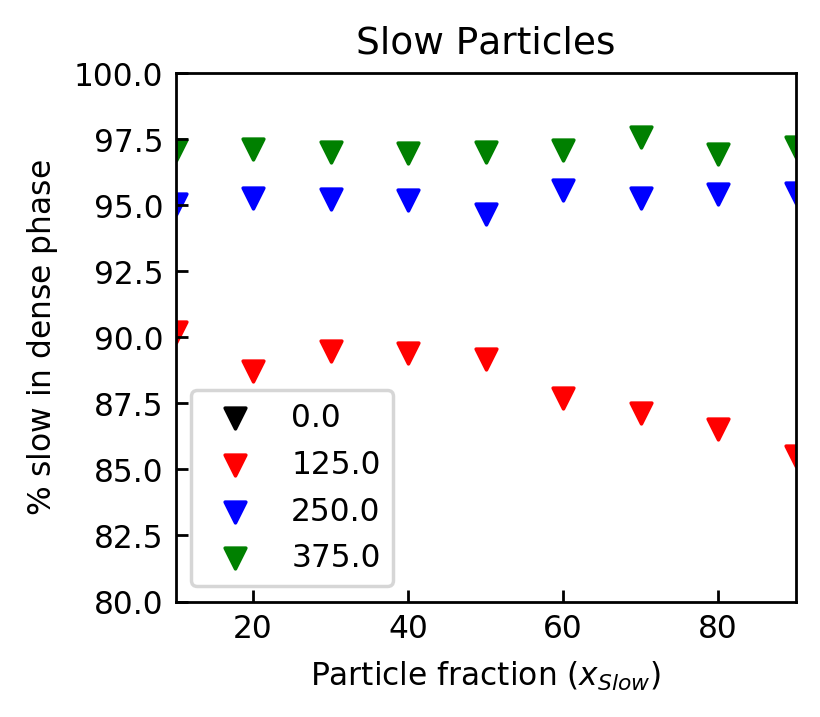

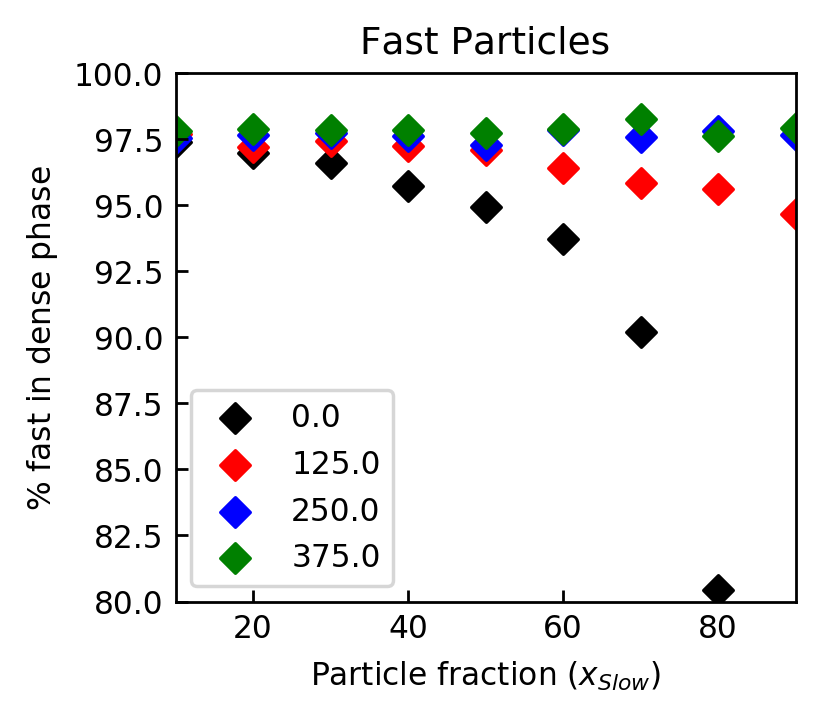

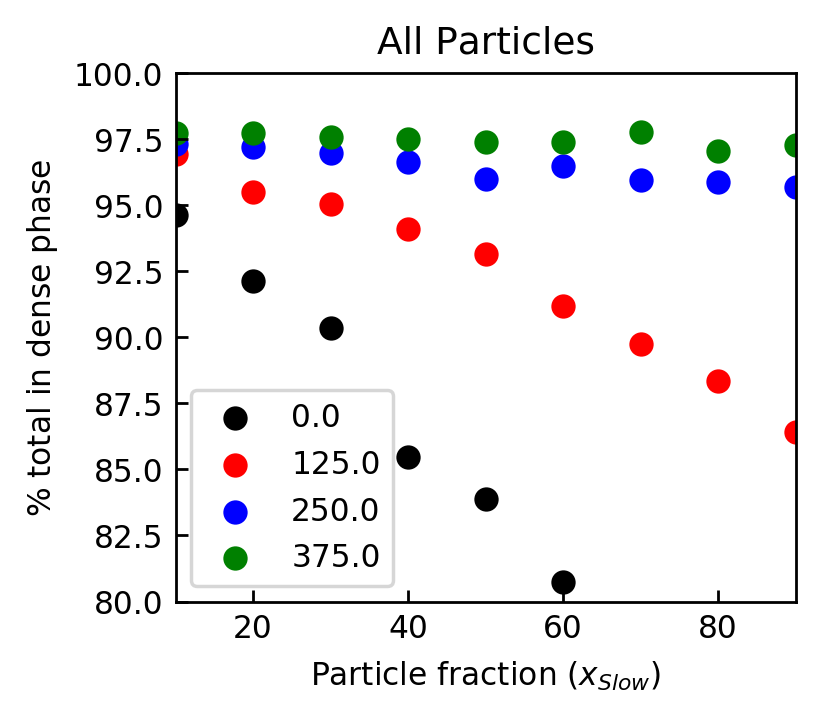

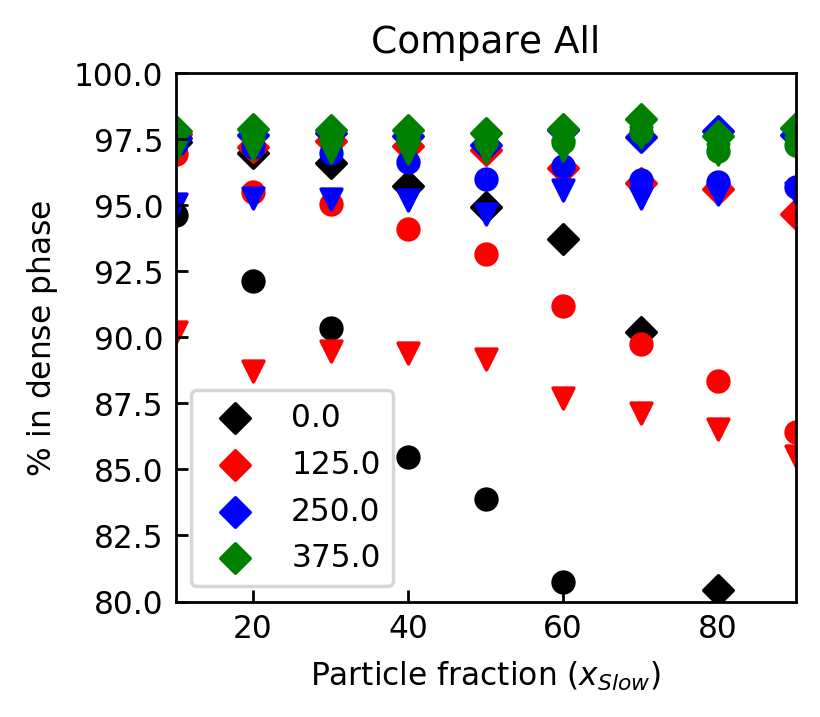

In [9]:
# Get the distinct Pe Slow values
distPeSlow = []
for i in xrange(len(txtFiles)):
    if params['peA'][i] not in distPeSlow:
        distPeSlow.append(params['peA'][i])
        
cols = ['k', 'r', 'b', 'g']
doSort(distPeSlow)

# Plot of only slow particles
for i in xrange(len(distPeSlow)):
    for j in xrange(len(txtFiles)):
        # Plot this
        if params['peA'][j] == distPeSlow[i]:
            plt.scatter(params['xA'][j], SS['Dense_A'][j], c=cols[i], marker='v', label=str(distPeSlow[i]))
            
# Display a plot for each set of pe slow data
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.xlim(10, 90)
plt.ylim(80, 100)
plt.xlabel(r'Particle fraction $(x_{Slow})$')
plt.ylabel(r'$\%$ slow in dense phase')
plt.title('Slow Particles')
plt.show()

# Plot of only fast particles
for i in xrange(len(distPeSlow)):
    for j in xrange(len(txtFiles)):
        # Plot this
        if params['peA'][j] == distPeSlow[i]:
            plt.scatter(params['xA'][j], SS['Dense_B'][j], c=cols[i], marker='D', label=str(distPeSlow[i]))
# Display a plot for each set of pe slow data
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.xlim(10, 90)
plt.ylim(80, 100)
plt.xlabel(r'Particle fraction $(x_{Slow})$')
plt.ylabel(r'$\%$ fast in dense phase')
plt.title('Fast Particles')
plt.show()

# Plot of total percentage
for i in xrange(len(distPeSlow)):
    for j in xrange(len(txtFiles)):
        # Plot this
        if params['peA'][j] == distPeSlow[i]:
            plt.scatter(params['xA'][j], SS['Dense_tot'][j], c=cols[i], marker='o', label=str(distPeSlow[i]))
# Display a plot for each set of pe slow data
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.xlim(10, 90)
plt.ylim(80, 100)
plt.xlabel(r'Particle fraction $(x_{Slow})$')
plt.ylabel(r'$\%$ total in dense phase')
plt.title('All Particles')
plt.show()

# Plot all of the data
for i in xrange(len(distPeSlow)):
    for j in xrange(len(txtFiles)):
        # Plot this
        if params['peA'][j] == distPeSlow[i]:
            plt.scatter(params['xA'][j], SS['Dense_tot'][j], c=cols[i], marker='o', label=str(distPeSlow[i]))
            plt.scatter(params['xA'][j], SS['Dense_A'][j], c=cols[i], marker='v', label=str(distPeSlow[i]))
            plt.scatter(params['xA'][j], SS['Dense_B'][j], c=cols[i], marker='D', label=str(distPeSlow[i]))
# Display a plot for each set of pe slow data
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.xlim(10, 90)
plt.ylim(80, 100)
plt.xlabel(r'Particle fraction $(x_{Slow})$')
plt.ylabel(r'$\%$ in dense phase')
plt.title('Compare All')
plt.show()
            

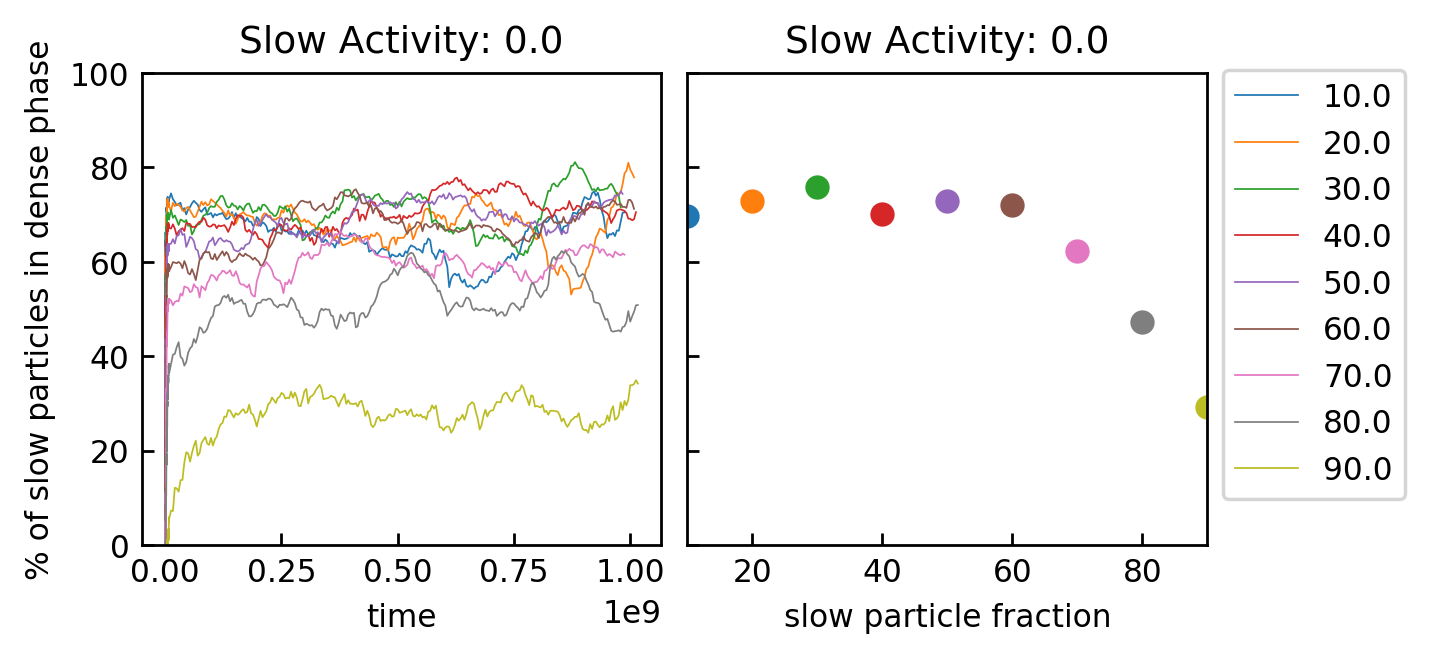

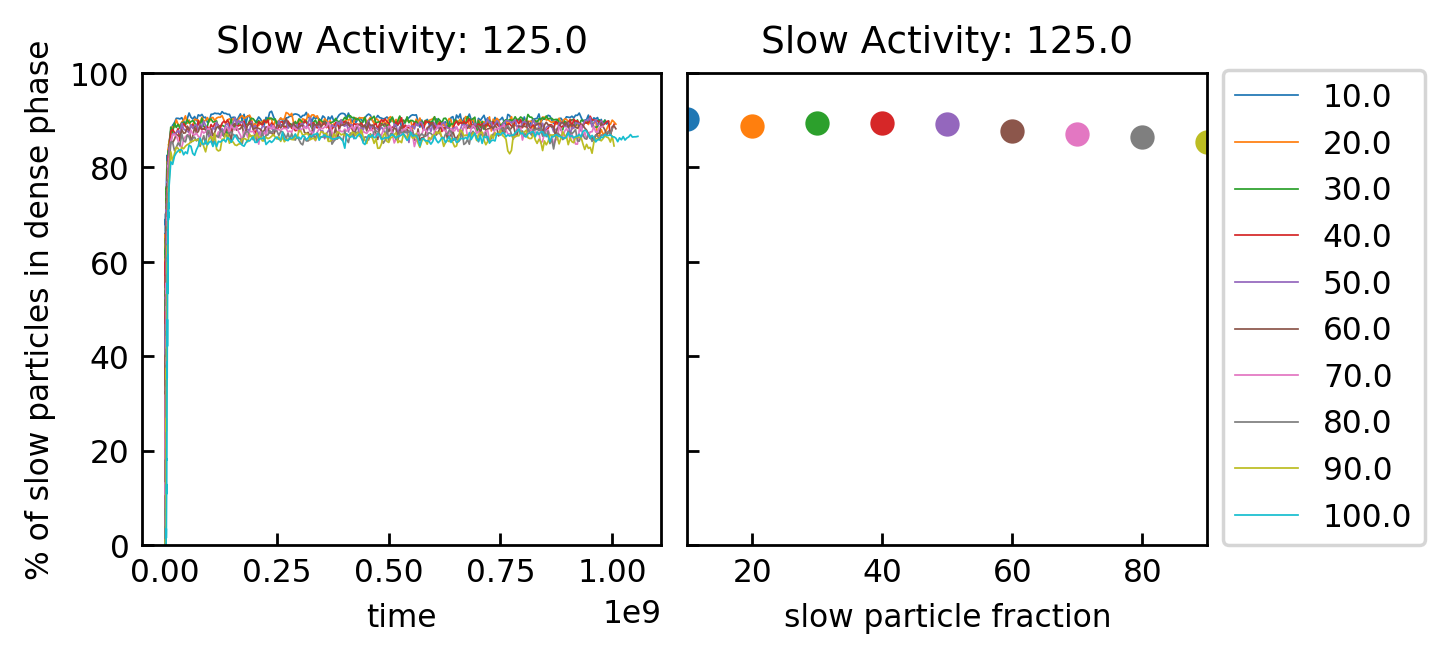

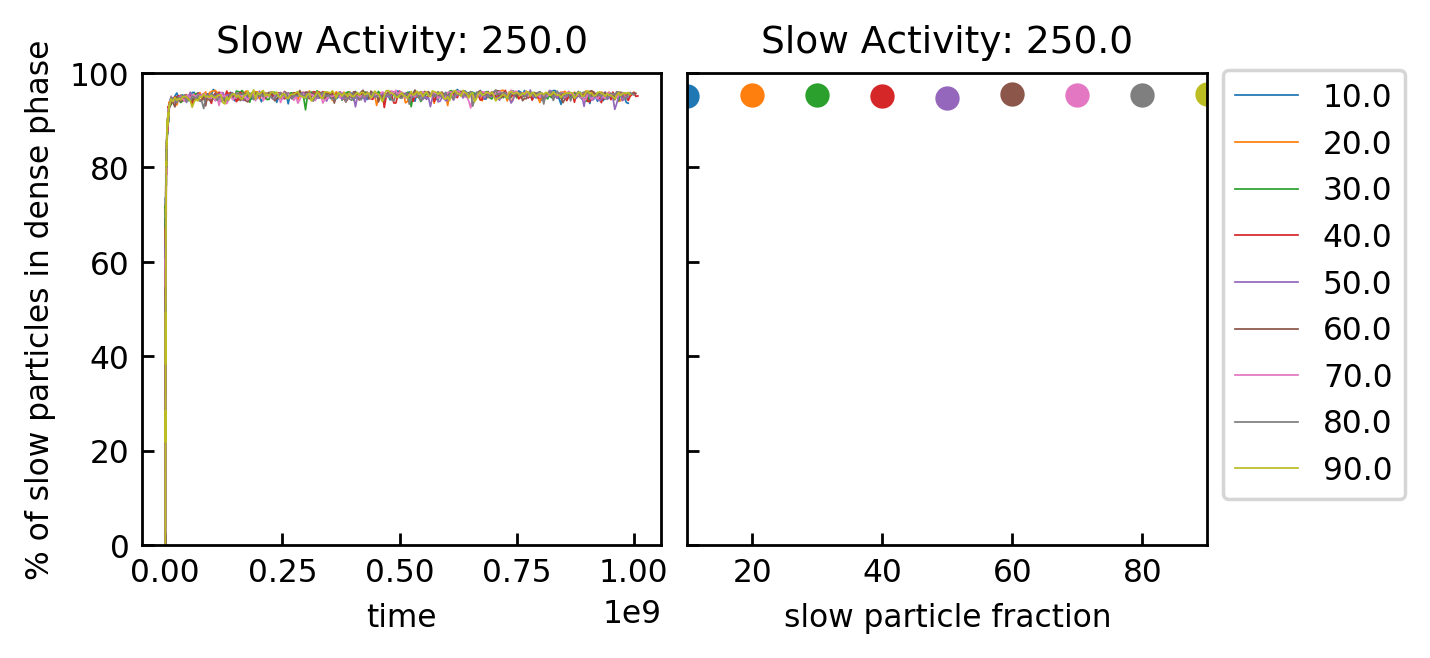

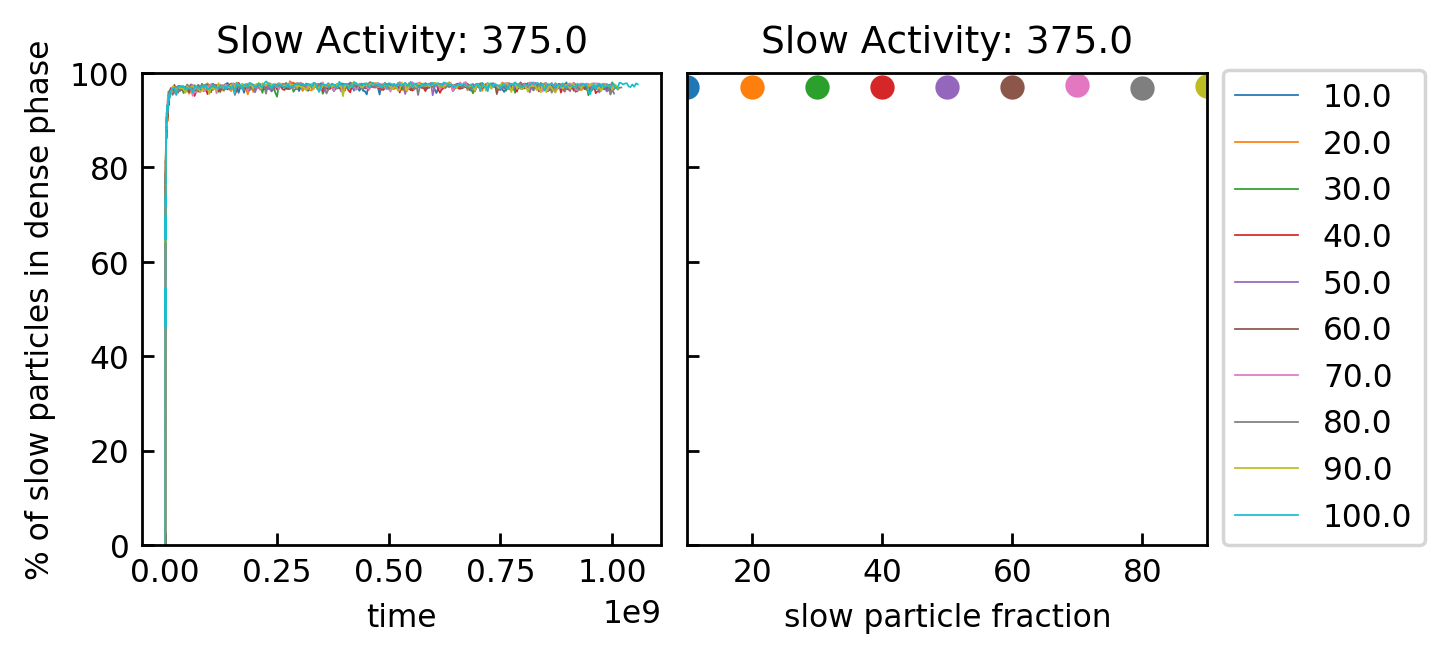

In [10]:
doSort(distPeSlow)

# Get the distinct xA values for each distinct Pe Slow
orderXA = [[] for i in xrange(len(distPeSlow))]
for i in xrange(len(distPeSlow)):
    for j in xrange(len(txtFiles)):
        if params['peA'][j] == distPeSlow[i]:
            if params['xA'][j] not in orderXA[i]:
                orderXA[i].append(params['xA'][j])

# Now sort each from low to high
for i in xrange(len(orderXA)):
    doSort(orderXA[i])

# Let's plot all simulations for each activity vs. time
for i in xrange(len(distPeSlow)):
    # Plot of slow particles over time
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(5.5,2.5), sharey=True)
    for j in xrange(len(orderXA[i])):
        for k in xrange(len(txtFiles)):
            if params['peA'][k] == distPeSlow[i] and params['xA'][k] == orderXA[i][j]:
                ax1.plot(all_sims[k]['Timestep'][:], all_sims[k]['Dense_A'][:] / params['partA'][k] * 100.0, label=str(params['xA'][k]))
        # Plot steady state for given activity
        for k in xrange(len(txtFiles)):
            if params['peA'][k] == distPeSlow[i] and params['xA'][k] == orderXA[i][j]:
                ax2.scatter(params['xA'][k], SS['Dense_A'][k])
    ax1.set_title('Slow Activity: ' + str(distPeSlow[i]))
    ax1.legend(bbox_to_anchor=(2.05, 1.04), loc=2)
    ax1.set_xlabel('time')
    ax1.set_ylabel('% of slow particles in dense phase')
    ax2.set_title('Slow Activity: ' + str(distPeSlow[i]))
    plt.ylim(0, 100)
    ax2.set_xlabel('slow particle fraction')
    ax2.set_xlim(10, 90)
    plt.subplots_adjust(wspace = 0.05)
    plt.show()

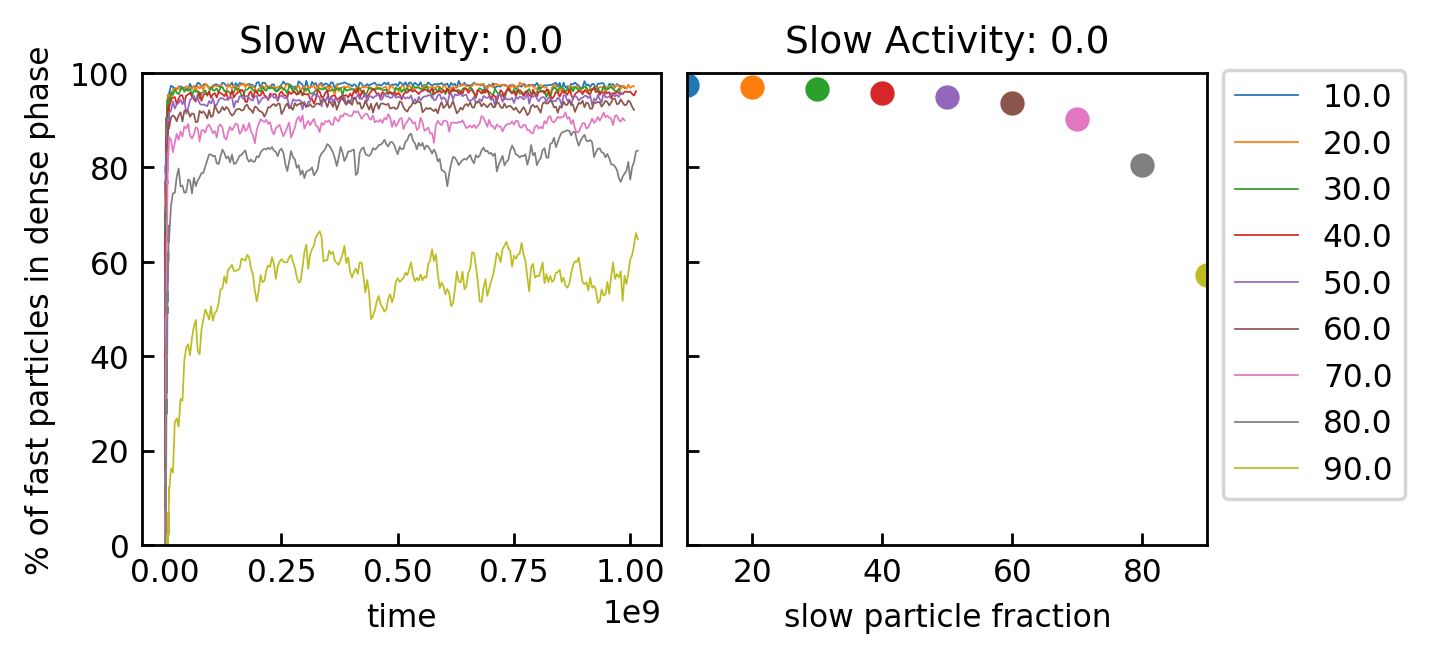

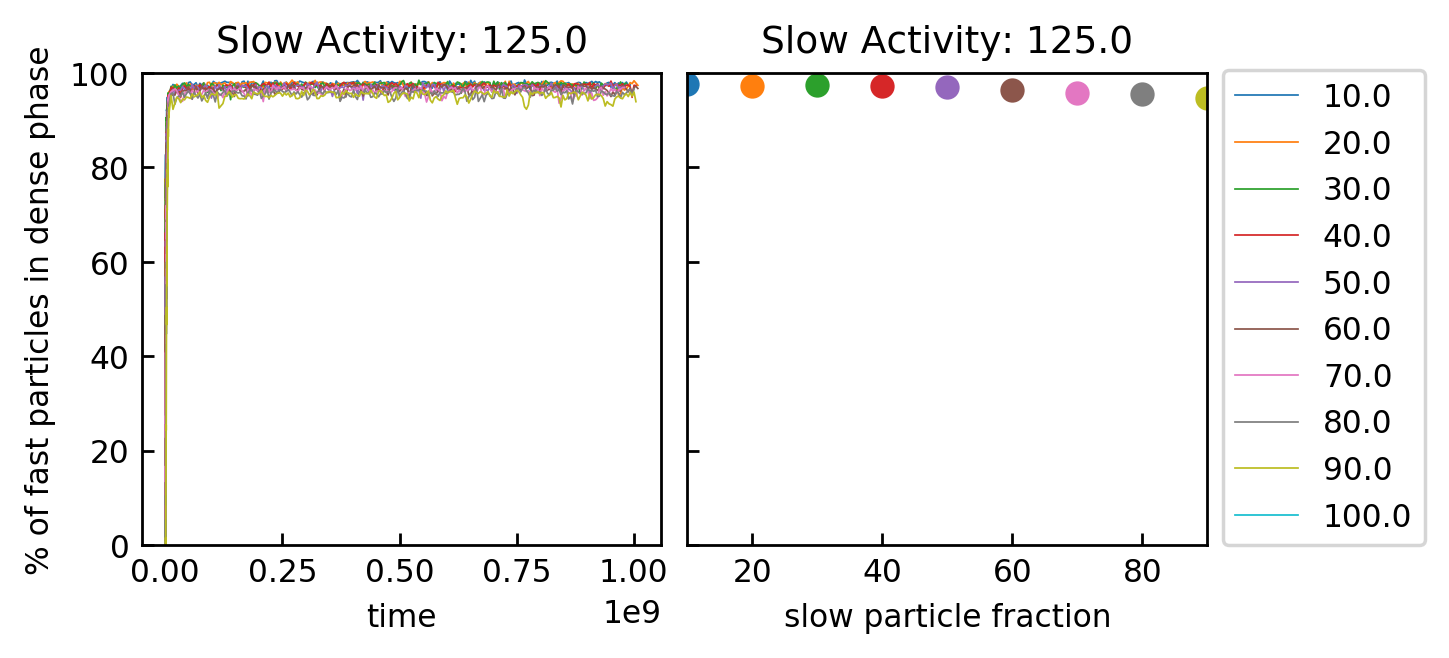

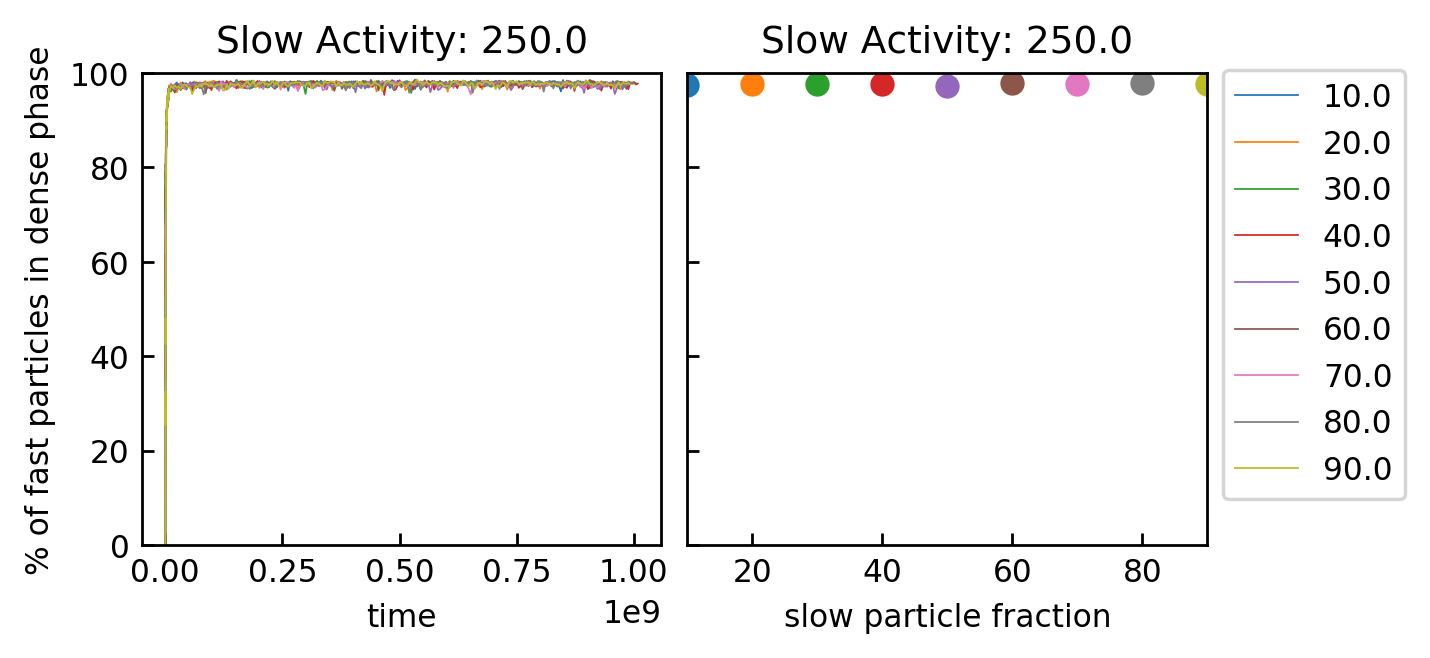

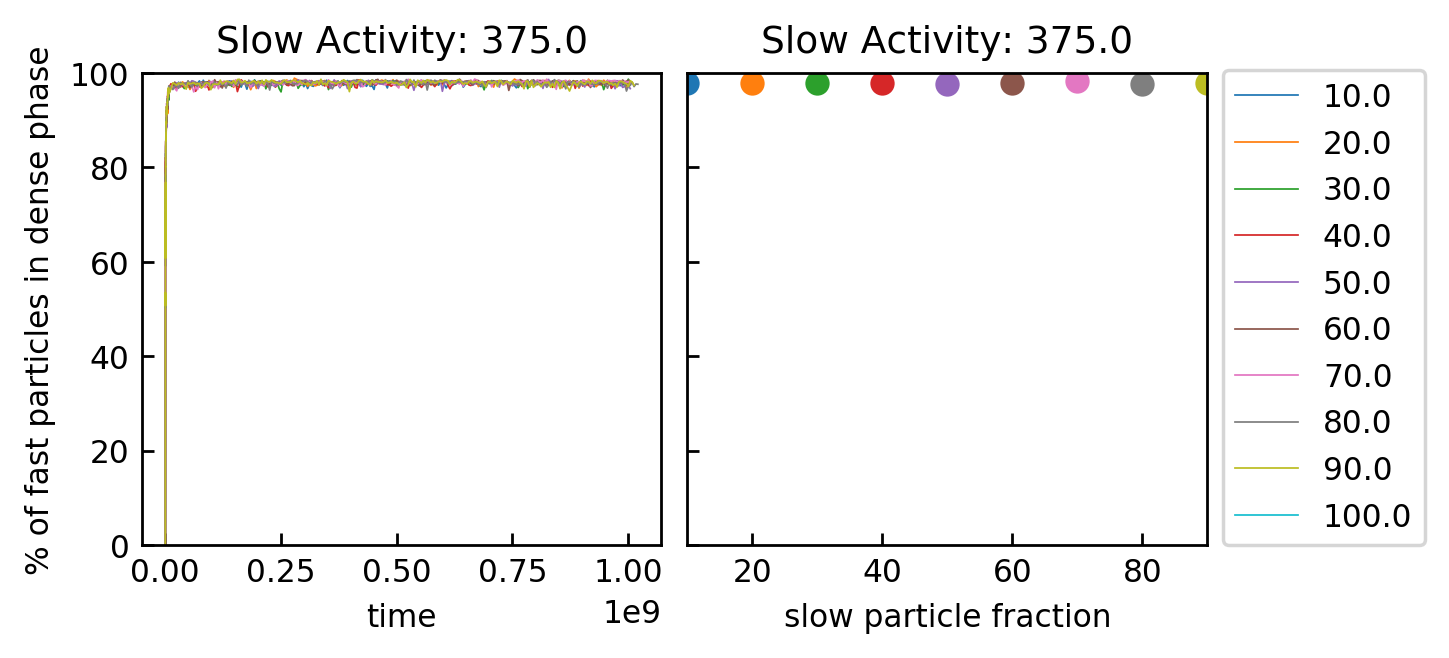

In [11]:
# Dense B
for i in xrange(len(distPeSlow)):
    # Plot of slow particles over time
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(5.5,2.5), sharey=True)
    for j in xrange(len(orderXA[i])):
        for k in xrange(len(txtFiles)):
            if params['peA'][k] == distPeSlow[i] and params['xA'][k] == orderXA[i][j]:
                ax1.plot(all_sims[k]['Timestep'][:], all_sims[k]['Dense_B'][:] / params['partB'][k] * 100.0, label=str(params['xA'][k]))
        # Plot steady state for given activity
        for k in xrange(len(txtFiles)):
            if params['peA'][k] == distPeSlow[i] and params['xA'][k] == orderXA[i][j]:
                ax2.scatter(params['xA'][k], SS['Dense_B'][k])
    ax1.set_title('Slow Activity: ' + str(distPeSlow[i]))
    ax1.legend(bbox_to_anchor=(2.05, 1.04), loc=2)
    ax1.set_xlabel('time')
    ax1.set_ylabel('% of fast particles in dense phase')
    ax2.set_title('Slow Activity: ' + str(distPeSlow[i]))
    plt.ylim(0, 100)
    ax2.set_xlabel('slow particle fraction')
    ax2.set_xlim(10,90)
    plt.subplots_adjust(wspace = 0.05)
    plt.show()

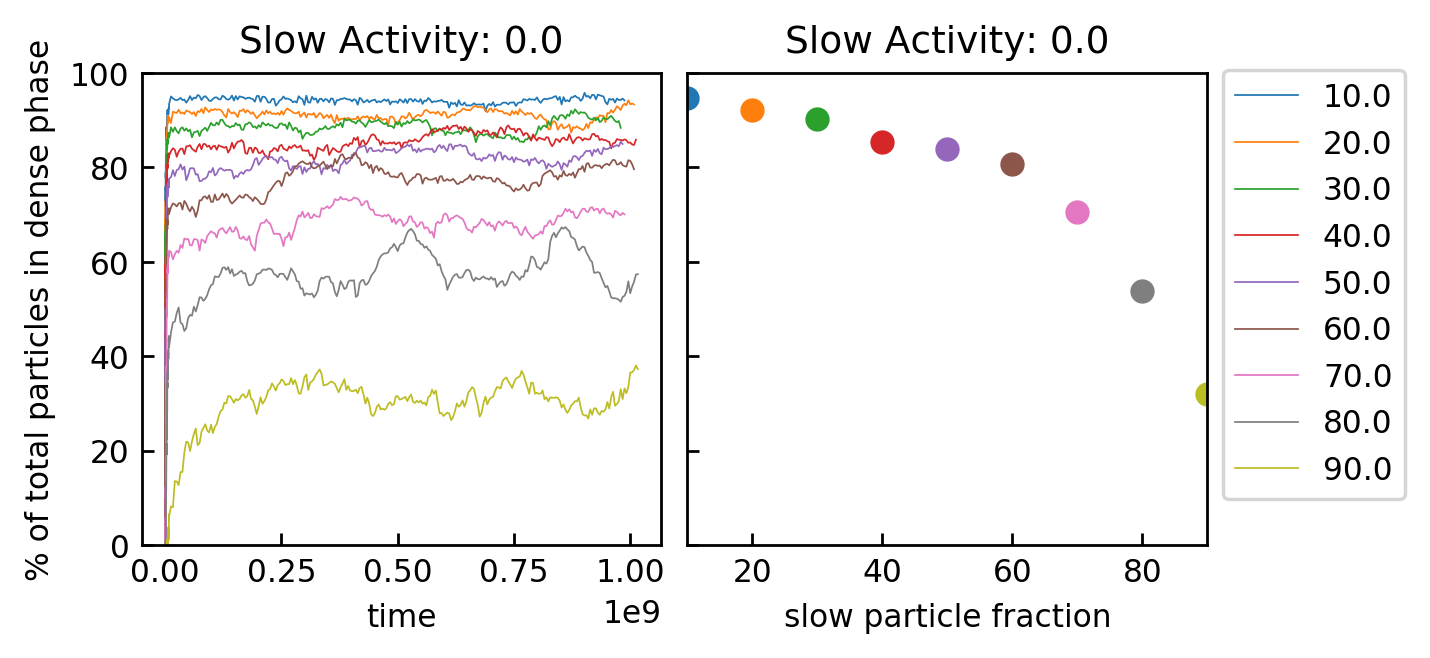

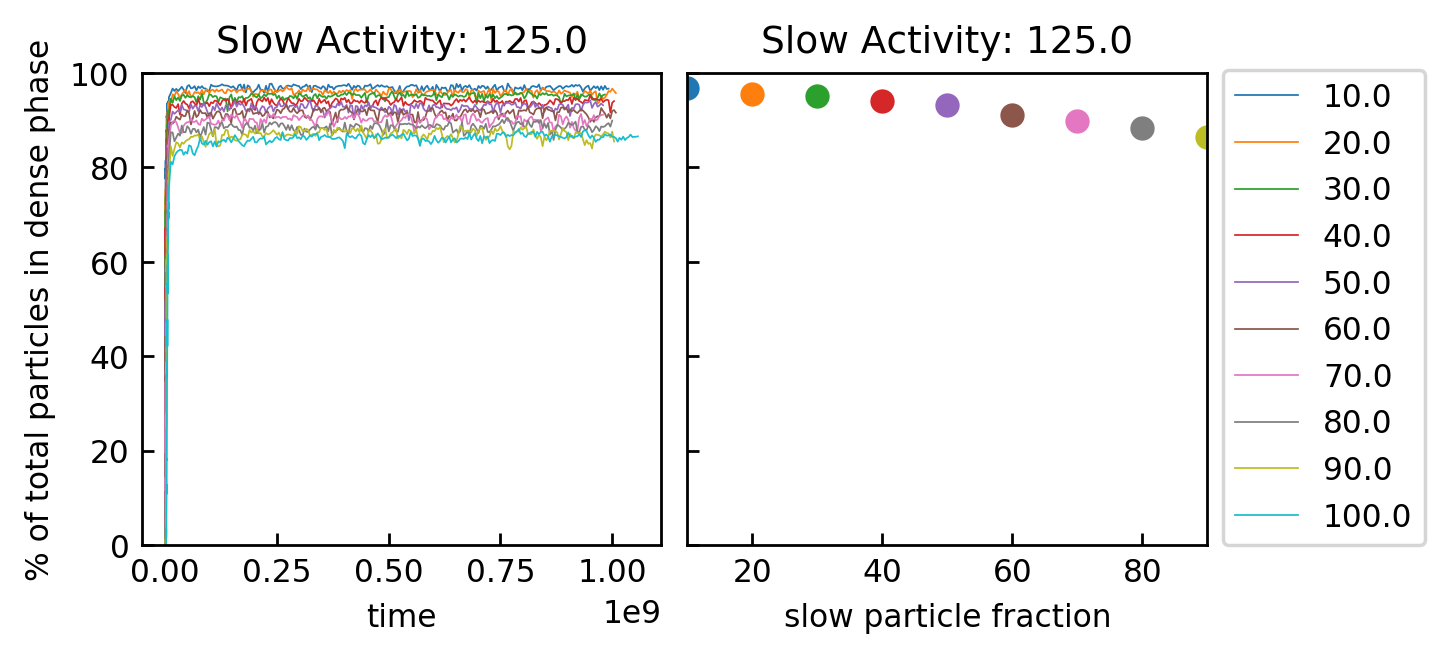

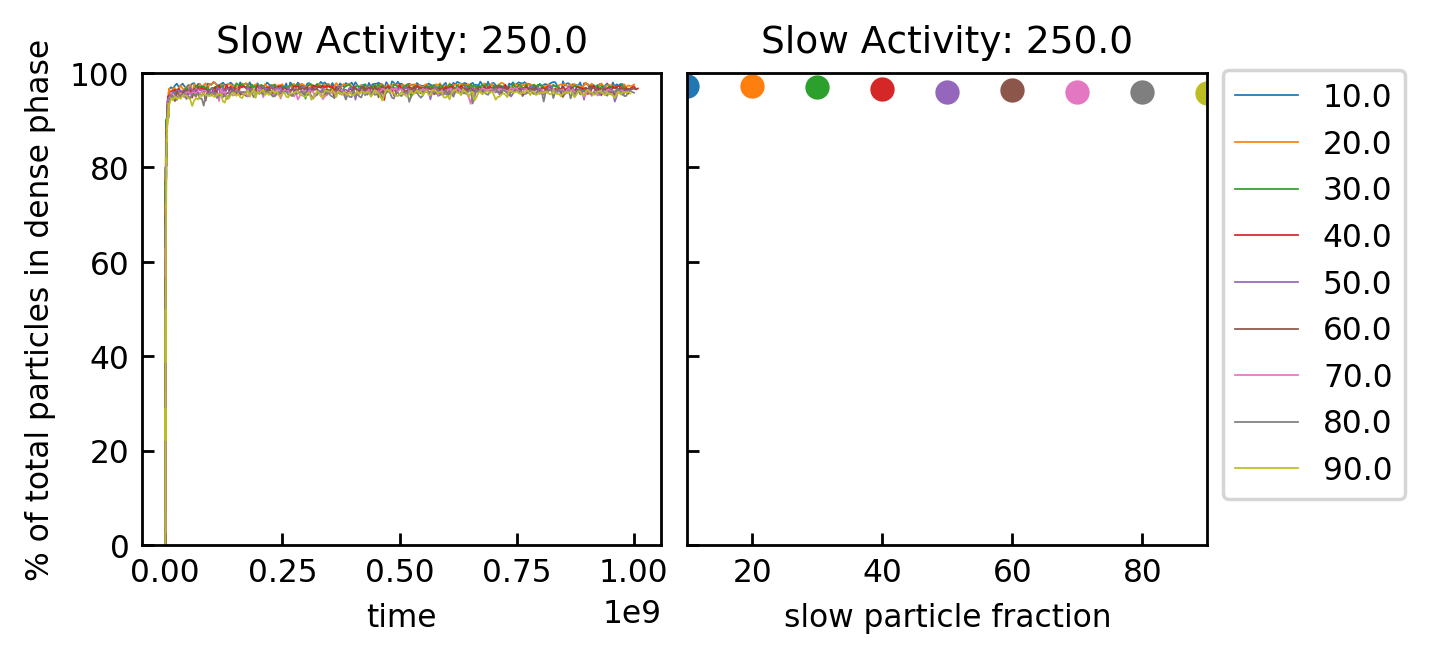

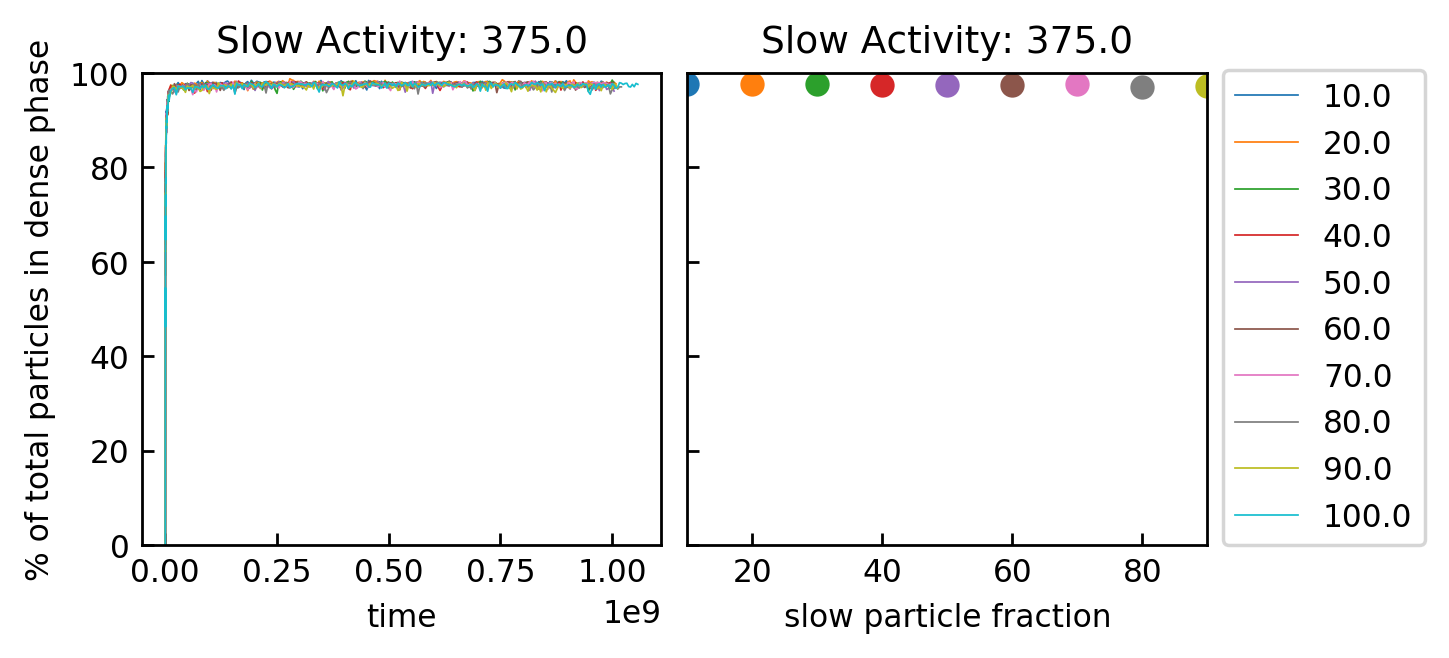

In [15]:
# Dense total
for i in xrange(len(distPeSlow)):
    # Plot of slow particles over time
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(5.5,2.5), sharey=True)
    for j in xrange(len(orderXA[i])):
        for k in xrange(len(txtFiles)):
            if params['peA'][k] == distPeSlow[i] and params['xA'][k] == orderXA[i][j]:
                ax1.plot(all_sims[k]['Timestep'][:], all_sims[k]['Dense_tot'][:] / params['partAll'][k] * 100.0, label=str(params['xA'][k]))
        # Plot steady state for given activity
        for k in xrange(len(txtFiles)):
            if params['peA'][k] == distPeSlow[i] and params['xA'][k] == orderXA[i][j]:
                ax2.scatter(params['xA'][k], SS['Dense_tot'][k])
    ax1.set_title('Slow Activity: ' + str(distPeSlow[i]))
    ax1.legend(bbox_to_anchor=(2.05, 1.04), loc=2)
    ax1.set_xlabel('time')
    ax1.set_ylabel('% of total particles in dense phase')
    ax2.set_title('Slow Activity: ' + str(distPeSlow[i]))
    plt.ylim(0, 100)
    ax2.set_xlabel('slow particle fraction')
    ax2.set_xlim(10,90)
    plt.subplots_adjust(wspace = 0.05)
    plt.show()

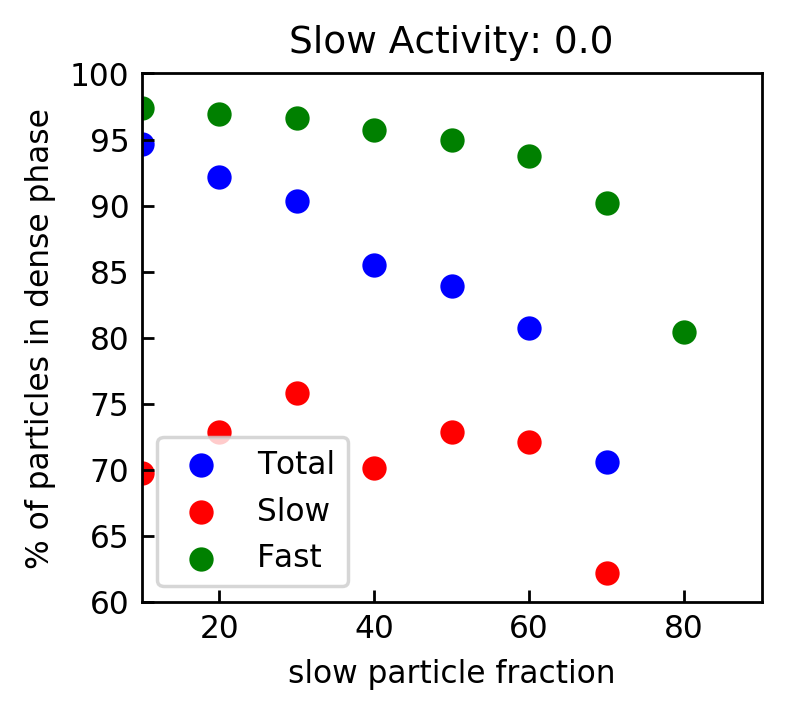

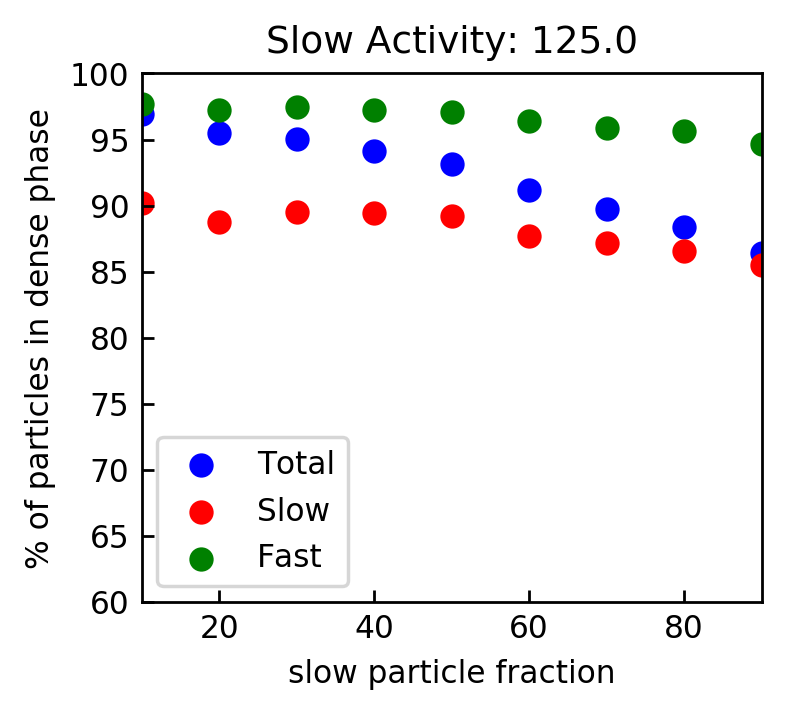

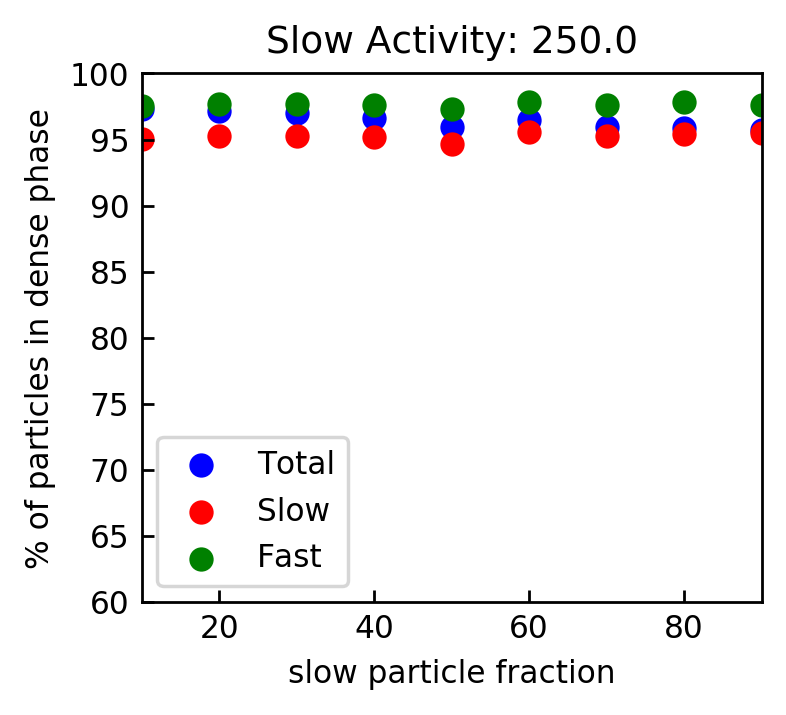

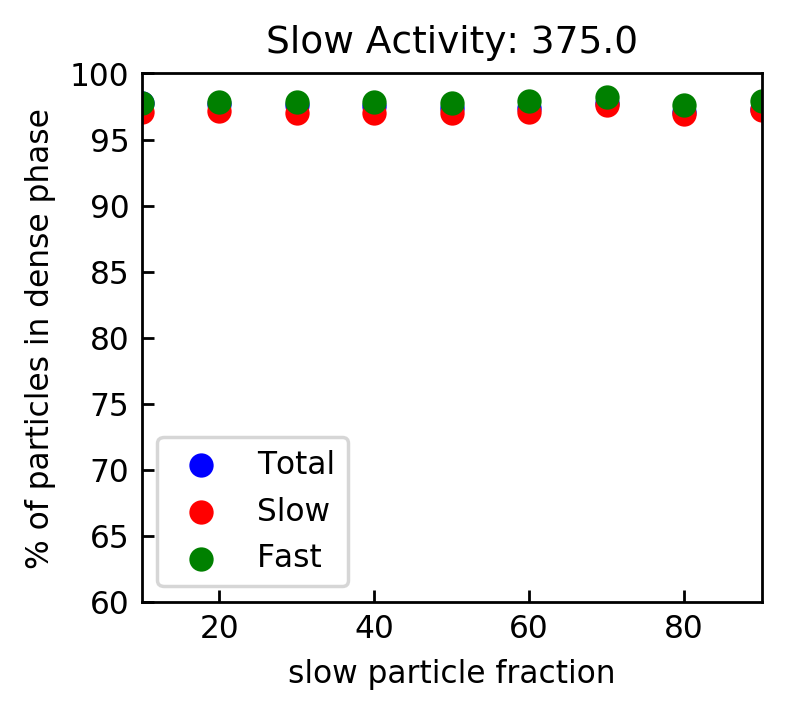

In [13]:
# Plot that compares same Pe simulations A, B, total
for i in xrange(len(distPeSlow)):
    for j in xrange(len(orderXA[i])):
        for k in xrange(len(txtFiles)):
            if params['peA'][k] == distPeSlow[i] and params['xA'][k] == orderXA[i][j]:
                plt.scatter(params['xA'][k], SS['Dense_tot'][k], c='b', label='Total')
                plt.scatter(params['xA'][k], SS['Dense_A'][k], c='r', label='Slow')
                plt.scatter(params['xA'][k], SS['Dense_B'][k], c='g', label='Fast')
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    plt.title('Slow Activity: ' + str(distPeSlow[i]))
    plt.xlabel('slow particle fraction')
    plt.ylabel('% of particles in dense phase')
    plt.xlim(10, 90)
    plt.ylim(60, 100)
    plt.show()

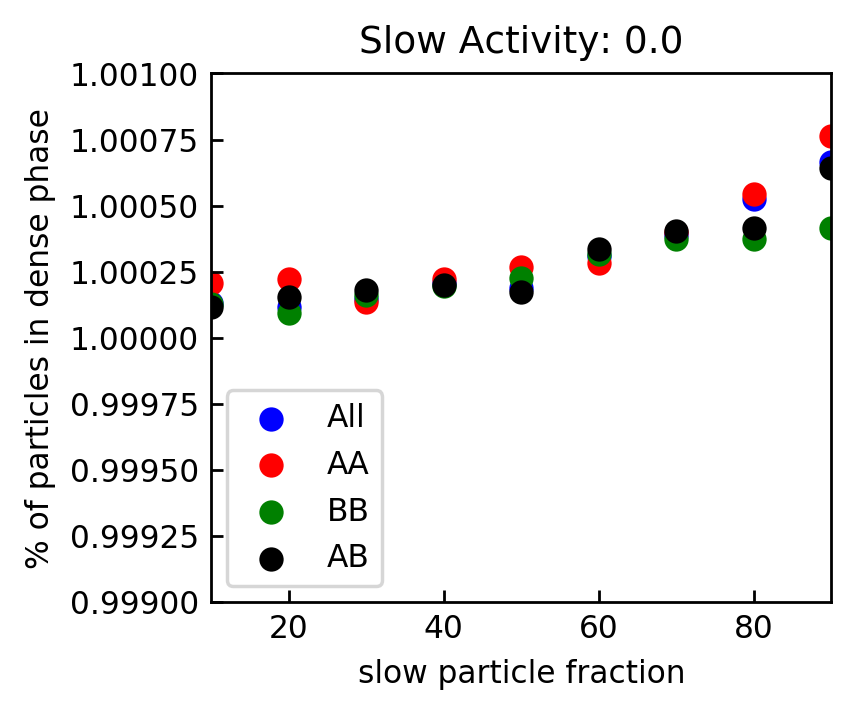

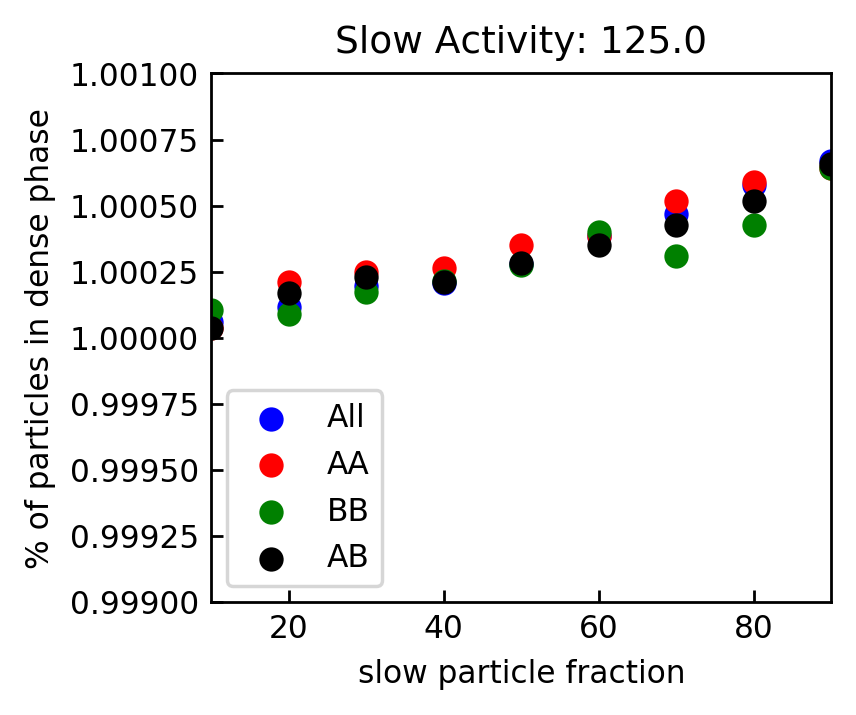

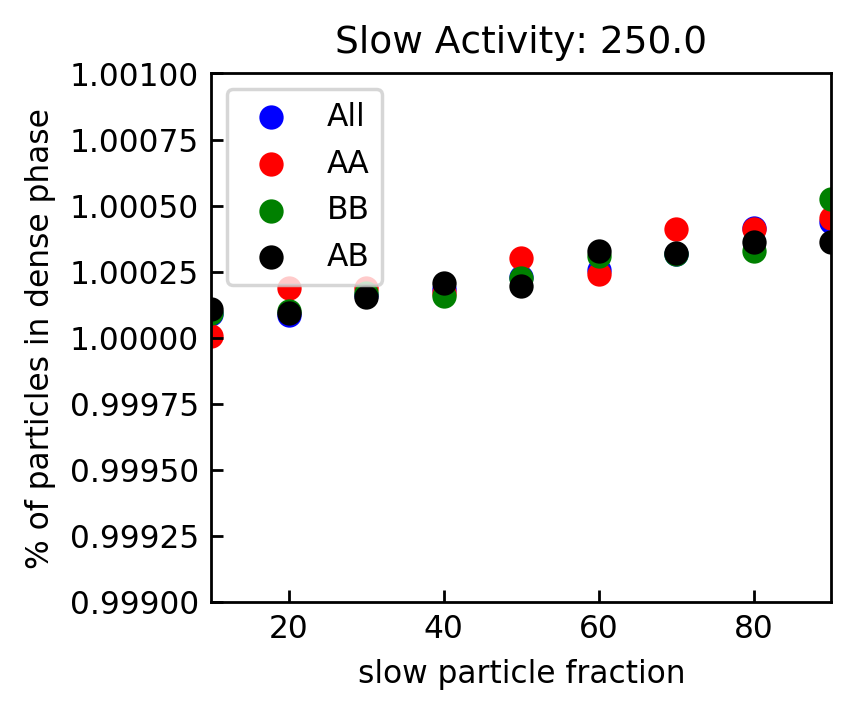

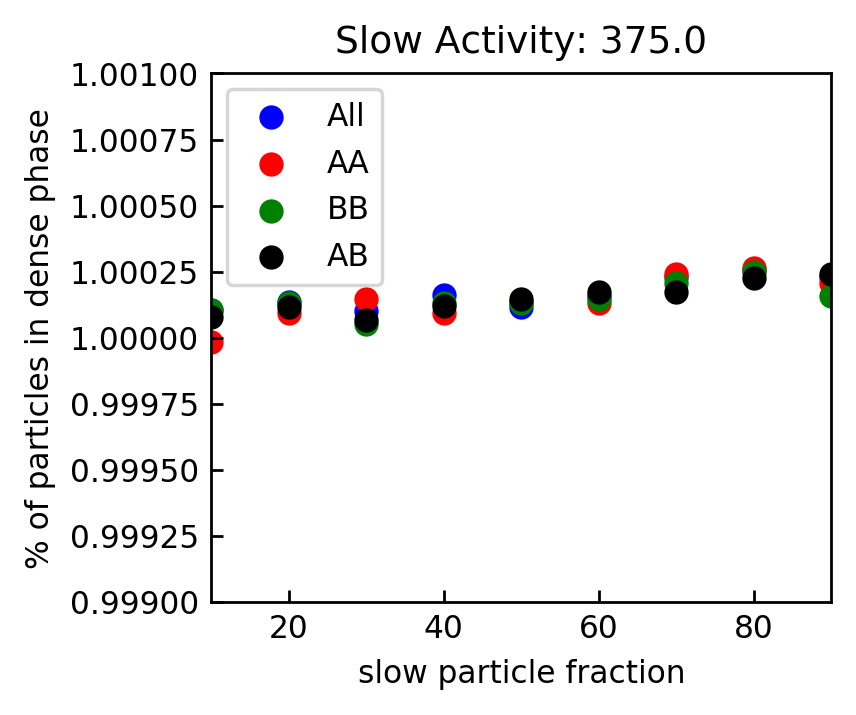

In [14]:
# I need to plot the diameter data
for i in xrange(len(distPeSlow)):
    for j in xrange(len(orderXA[i])):
        for k in xrange(len(txtFiles)):
            if params['peA'][k] == distPeSlow[i] and params['xA'][k] == orderXA[i][j]:
                plt.scatter(params['xA'][k], SS['sigALL'][k], c='b', label='All')
                plt.scatter(params['xA'][k], SS['sigAA'][k], c='r', label='AA')
                plt.scatter(params['xA'][k], SS['sigBB'][k], c='g', label='BB')
                plt.scatter(params['xA'][k], SS['sigAB'][k], c='k', label='AB')
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    plt.title('Slow Activity: ' + str(distPeSlow[i]))
    plt.xlabel('slow particle fraction')
    plt.ylabel('% of particles in dense phase')
    plt.xlim(10, 90)
    plt.ylim(0.999, 1.001)
    plt.show()